<a href="https://colab.research.google.com/github/KeerthiGadiparthy/Fashion-Recommendation-System/blob/main/idp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

os.environ['TF_CUDNN_DETERMINISTIC']='1'
# os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices=false'

import tensorflow as tf


SEED = 1
def set_seed(seed=SEED):
    tf.keras.utils.set_random_seed(seed)
set_seed()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data = pd.read_csv(
    '/content/drive/MyDrive/styles.csv',
    on_bad_lines = 'skip'
                  )

data = data.dropna()
data = pd.DataFrame(data)

image_path = '/content/drive/MyDrive/images'

In [ ]:
data

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [ ]:
import os

# Step 1: Get all available image IDs
image_files = set([f.split('.')[0] for f in os.listdir(image_path) if f.endswith('.jpg')])

# Step 2: Filter the dataset to only include rows where 'id' matches an image file
filtered_data = data[data['id'].astype(str).isin(image_files)]

def show_k_random(k, name):
    # Use the filtered dataset
    choices = np.random.choice(filtered_data.index, k, replace=False)
    choices = filtered_data.loc[choices, ['id', name]]

    fig, axs = plt.subplots(1, k, figsize=(15, 10))

    for this_name, id, ax in zip(choices[name], choices['id'], axs.ravel()):
        img_path = f"{image_path}/{id}.jpg"

        # Load the image if it exists (this is ensured now by filtering)
        img = plt.imread(img_path)
        ax.imshow(img, cmap='gray')

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'{this_name}')

    plt.tight_layout()
    plt.show()


gender


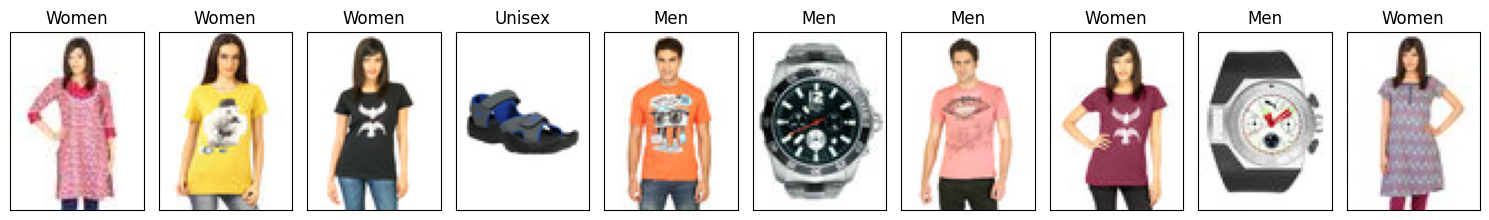

masterCategory


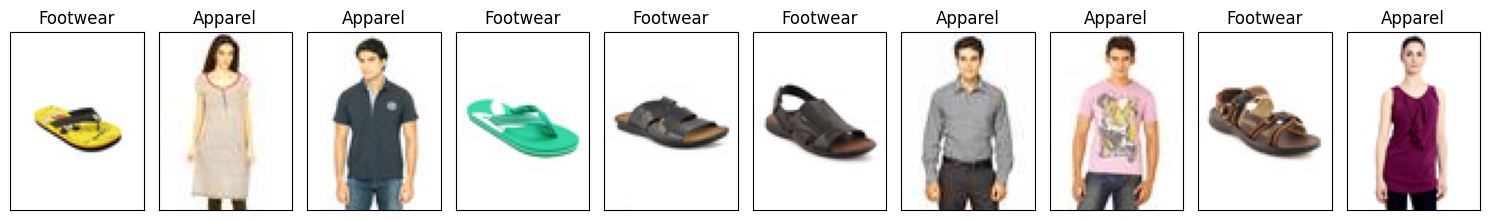

subCategory


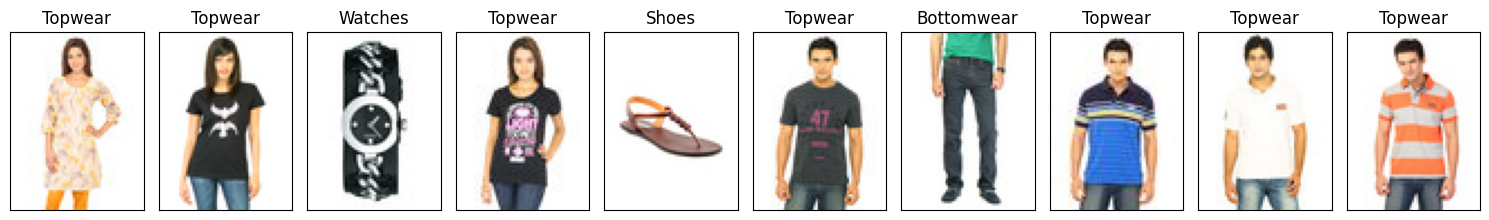

articleType


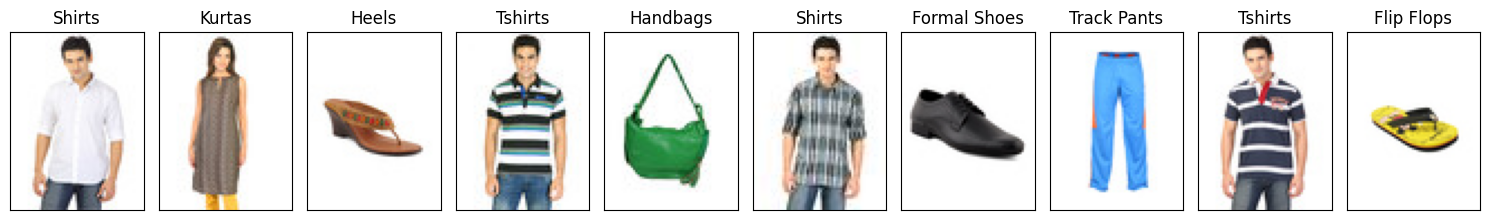

baseColour


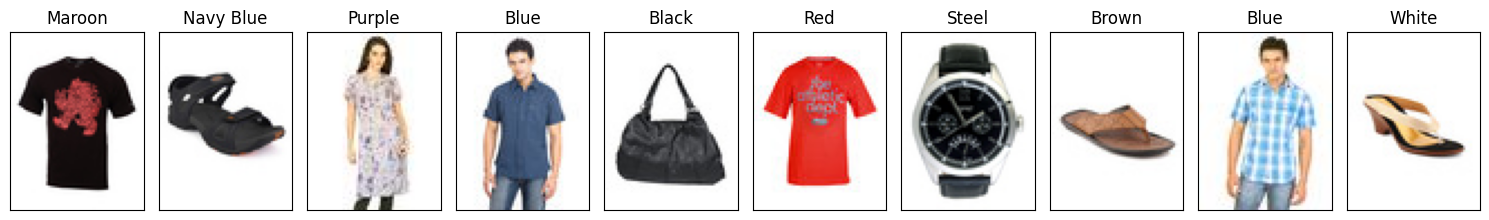

season


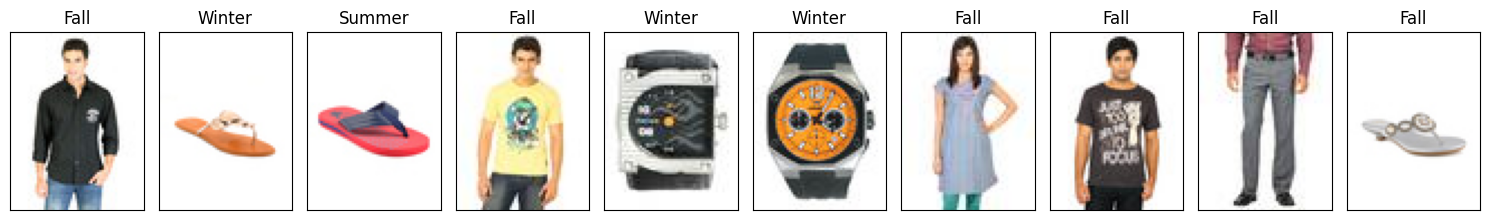

year


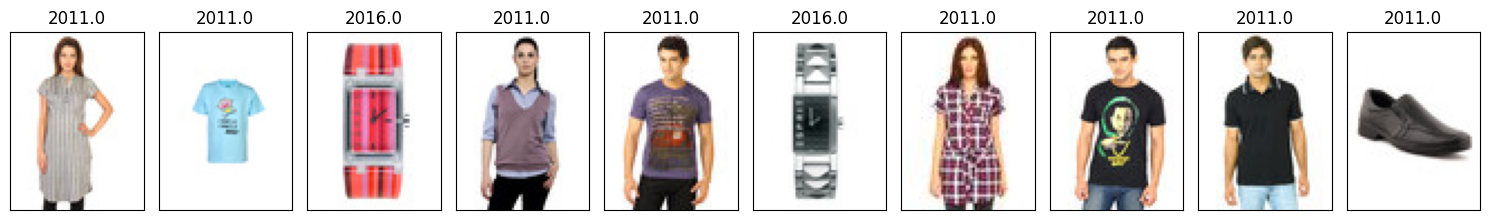

usage


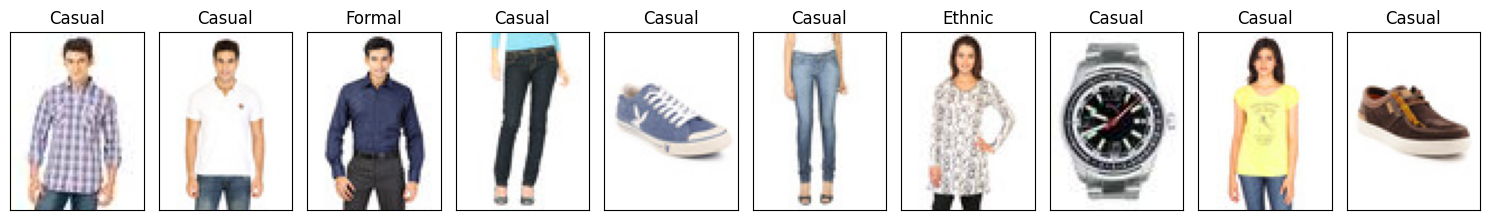

In [ ]:
labels = data.columns[1:-1]
for col in labels:
    print(col)
    show_k_random(10, col)

In [ ]:
def get_lookup(name):
    return tf.keras.layers.StringLookup(
        vocabulary=(data[name]).astype(str).unique(),
        oov_token='<OOV>',
        dtype=tf.int64
    )

label_lookups = {}
for label in labels:
    label_lookups[label] = get_lookup(label)

def get_labels(row):
    label_list = {}
    label_list['id'] = row['id']
    label_list['path'] = path = f"{image_path}/{row['id']}.jpg"
    for label in labels:
        label_list[label] = int(label_lookups[label](str(row[label])))
    return label_list

In [ ]:
from tqdm.notebook import tqdm

new_data = []
if os.path.exists('/kaggle/input/data-labels-fashion-product-images-small/data_labels.csv'):
    print('Loading...')
    new_data = pd.read_csv('/kaggle/input/data-labels-fashion-product-images-small/data_labels.csv')
else:
    for i, row in tqdm(data.iterrows(), total=data.shape[0]):
        path = f"{image_path}/{row['id']}.jpg"
        if os.path.exists(path):
            new_data.append(get_labels(row))

print(f'Successfully loaded images: {len(new_data)} ({len(new_data) / len(data) * 100}%)')

  0%|          | 0/44077 [00:00<?, ?it/s]

Successfully loaded images: 2193 (4.97538398711346%)


In [ ]:
data_labels = pd.DataFrame(new_data)
data_labels.to_csv('data_labels.csv', index=False)
data_labels

,id,path,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage
0,12369,/content/drive/MyDrive/images/12369.jpg,1,1,1,1,7,1,1,3
1,10268,/content/drive/MyDrive/images/10268.jpg,1,3,5,17,4,1,2,3
2,11188,/content/drive/MyDrive/images/11188.jpg,1,2,3,3,3,3,3,1
3,10866,/content/drive/MyDrive/images/10866.jpg,1,1,1,5,17,1,1,1
4,11940,/content/drive/MyDrive/images/11940.jpg,1,3,10,13,4,2,1,1
...,...,...,...,...,...,...,...,...,...,...
2188,10445,/content/drive/MyDrive/images/10445.jpg,1,1,2,2,2,1,1,1
2189,11597,/content/drive/MyDrive/images/11597.jpg,2,1,1,21,29,2,1,2
2190,10021,/content/drive/MyDrive/images/10021.jpg,1,1,2,24,8,4,8,4
2191,10213,/content/drive/MyDrive/images/10213.jpg,2,2,8,10,4,3,5,1


In [ ]:
# Hyperparams
BATCH_SIZE = 64
IMAGE_SIZE = [80, 60]

In [ ]:
from sklearn.model_selection import train_test_split

# Creating the TensorFlow dataset
# Helper Class
class splitter:
    def __init__(self, category, df, num_classes,
                image_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
                train_size=0.6, valid_size=0.3, test_size=0.1, silent=False
                ):
        assert (train_size + test_size + valid_size == 1), "Test + Train + Valid must be 1"

        self.category = category
        self.image_size = image_size
        self.batch_size = batch_size
        self.num_classes = num_classes
        test, train, valid = self.split(df, train_size, test_size, valid_size, silent)
        self.test_ds = self.create_tf_dataset(test)
        self.train_ds = self.create_tf_dataset(train)
        self.valid_ds = self.create_tf_dataset(valid)

    def split(self, df, train_size, test_size, valid_size, silent):
        # Split data into training and test set
        train_df, temp_df = train_test_split(df, test_size=(test_size+valid_size), random_state=SEED)

        # Split the temporary set into validation and test sets
        validation_df, test_df = train_test_split(temp_df, test_size=(test_size/(valid_size + test_size)), random_state=SEED)

        if not silent:
            # Print the sizes of each set
            print(self.category + ":")
            print(f"\tTraining set size: {len(train_df)} ({int(len(train_df)/len(data) * 100)}%)")
            print(f"\tValidation set size: {len(validation_df)} ({int(len(validation_df)/len(data) * 100)}%)")
            print(f"\tTest set size: {len(test_df)} ({int(len(test_df)/len(data) * 100)}%)")

        return test_df, train_df, validation_df

    def load_image(self, image_path):
        image = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.cast(image, tf.float32)
        image = tf.image.resize(image, self.image_size)  # Resize to the desired size
        image = image / 255.0  # Normalize to [0, 1]
        return image

    def map_func(self, path, label):
        image = self.load_image(path)
        return image, label

    def create_tf_dataset(self, df):
        x = df['path'].tolist()
        y = np.array(df[self.category].tolist(), dtype=np.int32)
        y -= 1
        y_one_hot = tf.keras.utils.to_categorical(y, num_classes=self.num_classes)

        dataset = tf.data.Dataset.from_tensor_slices((x, y_one_hot))
        dataset = dataset.map(lambda path, label: self.map_func(path, label))
        dataset = dataset.shuffle(buffer_size=len(df))
        dataset = dataset.batch(self.batch_size)
        dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
        return dataset

    def get_data(self):
        return self.train_ds, self.valid_ds, self.test_ds, self.num_classes

In [ ]:
splitters = {}
for label in labels:
    num_classes = int(data_labels[label].max())
    splitters[label] = splitter(label, data_labels, num_classes)

gender:
	Training set size: 1315 (2%)
	Validation set size: 658 (1%)
	Test set size: 220 (0%)
masterCategory:
	Training set size: 1315 (2%)
	Validation set size: 658 (1%)
	Test set size: 220 (0%)
subCategory:
	Training set size: 1315 (2%)
	Validation set size: 658 (1%)
	Test set size: 220 (0%)
articleType:
	Training set size: 1315 (2%)
	Validation set size: 658 (1%)
	Test set size: 220 (0%)
baseColour:
	Training set size: 1315 (2%)
	Validation set size: 658 (1%)
	Test set size: 220 (0%)
season:
	Training set size: 1315 (2%)
	Validation set size: 658 (1%)
	Test set size: 220 (0%)
year:
	Training set size: 1315 (2%)
	Validation set size: 658 (1%)
	Test set size: 220 (0%)
usage:
	Training set size: 1315 (2%)
	Validation set size: 658 (1%)
	Test set size: 220 (0%)


In [ ]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler


# A class to help train and analyze
class NNTrainer:
    def __init__(self, model: keras.Sequential, test_ds, train_ds, valid_ds, category, epochs):
        self.model = model
        self.test_ds = test_ds
        self.train_ds = train_ds
        self.valid_ds = valid_ds
        self.category = category
        self.epochs = epochs
        self.history_frame = None

    def train(self, callbacks=None):
        if callbacks == None:
            early_stopping = EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True,
            )

            lr_scheduler = LearningRateScheduler(lambda epoch, lr: lr if epoch < 10 else lr * 0.99)
            callbacks = [early_stopping, lr_scheduler]

        print('Training with:')
        for c in callbacks:
            print(str(type(c)).split('.')[-1][:-2])
        self.history = self.model.fit(
            self.train_ds,
            validation_data=self.valid_ds,
            epochs=self.epochs,
            callbacks=callbacks
        )

        if self.history_frame == None:
            self.history_frame = pd.DataFrame(self.history.history)

    def plot(self):
        # Create a figure and axes
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # Plot loss
        axes[0].plot(self.history_frame.index, self.history_frame['loss'], label='Training Loss')
        axes[0].plot(self.history_frame.index, self.history_frame['val_loss'], label='Validation Loss')
        axes[0].set_title('Loss')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Loss')
        axes[0].legend()

        # Plot accuracy
        axes[1].plot(self.history_frame.index, self.history_frame['categorical_accuracy'], label='Training Accuracy')
        axes[1].plot(self.history_frame.index, self.history_frame['val_categorical_accuracy'], label='Validation Accuracy')
        axes[1].set_title('Accuracy')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Accuracy')
        axes[1].legend()

    def test(self, show=False, silent=False):
        test_loss, test_accuracy = self.model.evaluate(self.test_ds, verbose=int(not show and not silent))
        if show and not silent:
            print(f'{self.category}:\tTest loss: {test_loss}, Test accuracy: {test_accuracy}')
        return test_loss, test_accuracy

    def summary(self):
        self.model.summary()

In [ ]:
from tensorflow.keras import layers

def get_model(num_classes, category, model_name='init', replace=False):
    if (not replace) and os.path.exists(f"{category}_model_{model_name}.keras") and \
        os.path.exists(f"{category}_history_{model_name}.csv"):
        print(f'{category}_model_{model_name} exists...')
        model = keras.models.load_model(f"{category}_model_{model_name}.keras")
        return model


    print(f'{category} model does not exist')
    model = keras.Sequential([
        layers.Input(shape=(*IMAGE_SIZE, 3)),

        # Block 1
        layers.Conv2D(filters=max(8, num_classes // 16), kernel_size=(3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Block 2
        layers.Conv2D(filters=max(16, num_classes // 8), kernel_size=(3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Flatten and dense layers
        layers.Flatten(),
        layers.Dense(max(64, num_classes // 2), activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ], name=f'{category}_model')

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.CategoricalCrossentropy(),  # For one-hot encoded labels
        metrics=[tf.keras.metrics.CategoricalAccuracy()]
    )

    return model

In [ ]:
def get_nnt(df, category, epochs, model_name='init', model=None, replace=False):
    train, valid, test, num_classes = splitters[category].get_data()
    num_classes = int(df[category].max())
    if model == None:
        model = get_model(num_classes, category, model_name, replace)
    nnt = NNTrainer(model, test, train, valid, category, epochs)
    if not replace:
        p_m = f"{category}_model_{model_name}.keras"
        p_h = f"{nnt.category}_history_{model_name}.csv"
        print(p_m)
        if os.path.exists(p_h) and os.path.exists(p_m):
            print('Loading history...')
            nnt.history_frame = pd.read_csv(p_h)
            new_model = keras.models.load_model(p_m)
            nnt.model = new_model
    return nnt

def get_nnts(df, labels, epochs=50, model_name='init'):
    nnts = {}
    for label in labels:
        nnts[label] = get_nnt(df, label, epochs, model_name)
    return nnts

def train_one(nnt, model_name='init', callbacks=None, replace=False):
    p_m = f"{nnt.category}_model_{model_name}.keras"
    p_h = f"{nnt.category}_history_{model_name}.csv"
    if (not replace) and os.path.exists(p_m) and os.path.exists(p_h):
        print('Model exists, training aborted.')
    else:
        nnt.train(callbacks)
        nnt.model.save(p_m)
        nnt.history_frame.to_csv(p_h)

def train_all(nnts, model_name='init'):
    for nnt in nnts:
        print(f'Training {nnt}...')
        train_one(nnts[nnt], model_name)

In [ ]:
nnts = get_nnts(data_labels, labels)
for nnt in nnts:
    nnts[nnt].summary()

gender model does not exist
gender_model_init.keras
masterCategory model does not exist
masterCategory_model_init.keras
subCategory model does not exist
subCategory_model_init.keras
articleType model does not exist
articleType_model_init.keras
baseColour model does not exist
baseColour_model_init.keras
season model does not exist
season_model_init.keras
year model does not exist
year_model_init.keras
usage model does not exist
usage_model_init.keras


Model: "gender_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)                   │ (None, 80, 60, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_51               │ (None, 80, 60, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 40, 30, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 40, 30, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_52               │ (None, 40, 30, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 20, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 4800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │         307,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_53               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 309,333 (1.18 MB)

 Trainable params: 309,157 (1.18 MB)

 Non-trainable params: 176 (704.00 B)

Model: "masterCategory_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 80, 60, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_54               │ (None, 80, 60, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 40, 30, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 40, 30, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_55               │ (None, 40, 30, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 20, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 4800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 64)                  │         307,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_56               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 309,333 (1.18 MB)

 Trainable params: 309,157 (1.18 MB)

 Non-trainable params: 176 (704.00 B)

Model: "subCategory_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)                   │ (None, 80, 60, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_57               │ (None, 80, 60, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 40, 30, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 40, 30, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_58               │ (None, 40, 30, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 20, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 4800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │         307,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_59               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 39)                  │           2,535 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 311,543 (1.19 MB)

 Trainable params: 311,367 (1.19 MB)

 Non-trainable params: 176 (704.00 B)

Model: "articleType_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 80, 60, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_60               │ (None, 80, 60, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 40, 30, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 40, 30, 17)          │           1,241 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_61               │ (None, 40, 30, 17)          │              68 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 20, 15, 17)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ (None, 5100)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 68)                  │         346,868 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_62               │ (None, 68)                  │             272 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 68)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 137)                 │           9,453 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 358,158 (1.37 MB)

 Trainable params: 357,972 (1.37 MB)

 Non-trainable params: 186 (744.00 B)

Model: "baseColour_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)                   │ (None, 80, 60, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_63               │ (None, 80, 60, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 40, 30, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 40, 30, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_64               │ (None, 40, 30, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 20, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 4800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 64)                  │         307,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_65               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 39)                  │           2,535 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 311,543 (1.19 MB)

 Trainable params: 311,367 (1.19 MB)

 Non-trainable params: 176 (704.00 B)

Model: "season_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)                   │ (None, 80, 60, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_66               │ (None, 80, 60, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 40, 30, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 40, 30, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_67               │ (None, 40, 30, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (None, 20, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_22 (Flatten)                 │ (None, 4800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 64)                  │         307,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_68               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 309,268 (1.18 MB)

 Trainable params: 309,092 (1.18 MB)

 Non-trainable params: 176 (704.00 B)

Model: "year_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)                   │ (None, 80, 60, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_69               │ (None, 80, 60, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_46 (MaxPooling2D)      │ (None, 40, 30, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 40, 30, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_70               │ (None, 40, 30, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_47 (MaxPooling2D)      │ (None, 20, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_23 (Flatten)                 │ (None, 4800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 64)                  │         307,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_71               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 13)                  │             845 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 309,853 (1.18 MB)

 Trainable params: 309,677 (1.18 MB)

 Non-trainable params: 176 (704.00 B)

Model: "usage_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)                   │ (None, 80, 60, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_72               │ (None, 80, 60, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_48 (MaxPooling2D)      │ (None, 40, 30, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 40, 30, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_73               │ (None, 40, 30, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_49 (MaxPooling2D)      │ (None, 20, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_24 (Flatten)                 │ (None, 4800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 64)                  │         307,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_74               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 309,398 (1.18 MB)

 Trainable params: 309,222 (1.18 MB)

 Non-trainable params: 176 (704.00 B)

In [ ]:
def train_all(nnts, model_name='init', subset_size=None):
    for nnt in nnts:
        print(f'Training {nnt}...')
        if subset_size:
            nnt.train_ds = nnt.train_ds.take(subset_size=100)  # Limit dataset size for quick training
            nnt.valid_ds = nnt.valid_ds.take(subset_size=100)
        train_one(nnts[nnt], model_name)


In [ ]:
category = 'gender'
nnt = nnts[category]

In [ ]:
import os
import pandas as pd
import keras

def get_nnt(df, category, epochs, model_name='init', model=None, replace=False):
    train, valid, test, num_classes = splitters[category].get_data()
    num_classes = int(df[category].max())
    if model is None:
        model = get_model(num_classes, category, model_name, replace)
    nnt = NNTrainer(model, test, train, valid, category, epochs)
    if not replace:
        p_m = f"{category}_model_{model_name}.keras"
        p_h = f"{nnt.category}_history_{model_name}.csv"
        print(f"Model path: {p_m}")
        print(f"History path: {p_h}")
        if os.path.exists(p_h) and os.path.exists(p_m):
            print('Loading history...')
            try:
                nnt.history_frame = pd.read_csv(p_h, index_col=0)  # Explicitly set index column
            except pd.errors.EmptyDataError:
                print("History file is empty, retraining the model.")
                replace = True
            except (pd.errors.ParserError, KeyError):  # Catch parsing errors and missing index column
                print("Error parsing history file or missing index column, retraining the model.")
                replace = True
            except Exception as e:
                print(f"Error loading history file: {e}, retraining the model.")
                replace = True
            else:
                try:
                    new_model = keras.models.load_model(p_m)
                    nnt.model = new_model
                except Exception as e:
                    print(f"Error loading model: {e}, retraining the model.")
                    replace = True

    if replace:
        print("Training the model.")
        nnt.train(None)
        nnt.model.save(p_m)
        nnt.history_frame.to_csv(p_h)  # Save with index

    return nnt

In [ ]:
num_classes = splitters[category].num_classes
num_classes

5

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

n_callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0)
]

In [ ]:
nnt_new_gender = get_nnt(data_labels, category, epochs=50, model_name='enhanced')
train_one(nnt_new_gender, model_name='enhanced', callbacks=n_callbacks)

gender_model_enhanced exists...
Model path: gender_model_enhanced.keras
History path: gender_history_enhanced.csv
Loading history...
Model exists, training aborted.


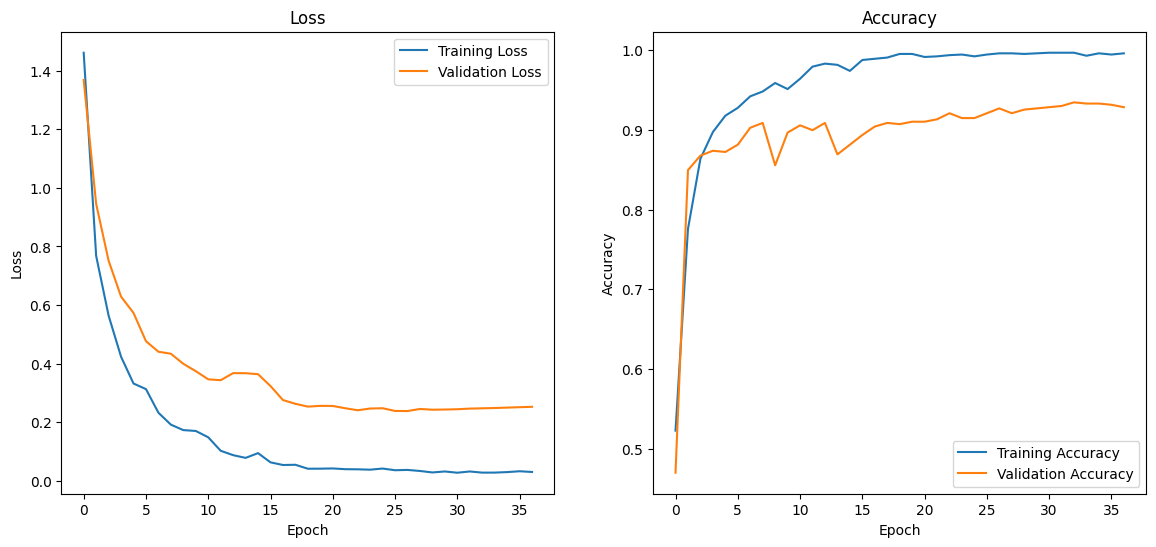

In [ ]:
nnt_new_gender.plot()

In [ ]:
pip install matplotlib


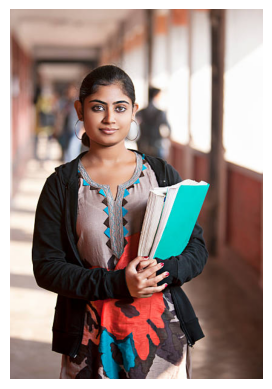

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image_for_gender(gender):
    if gender.lower() == "male":
        image_path = "path/to/male_image.jpg"
    elif gender.lower() == "female":
        image_path = "/content/gurl.jpg"
    else:
        image_path = "path/to/default_image.jpg"

    # Read and display the image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

# Example usage
gender = "female"  # or "male"
show_image_for_gender(gender)


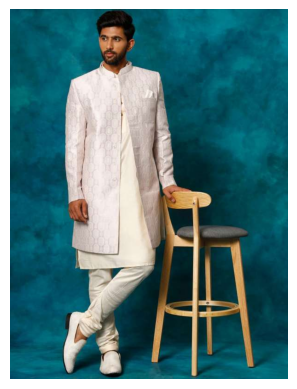

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image_for_gender(gender):
    if gender.lower() == "male":
        image_path = "/content/men.jpg"
    elif gender.lower() == "female":
        image_path = "path/to/female_image.jpg"
    else:
        image_path = "path/to/default_image.jpg"

    # Read and display the image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

# Example usage
gender = "male"  # or "male"
show_image_for_gender(gender)


In [ ]:
nnt_new_gender.test(show=True)

gender:	Test loss: 0.3981083631515503, Test accuracy: 0.9136363863945007


(0.3981083631515503, 0.9136363863945007)

In [ ]:
nnt.test(show=True)

gender:	Test loss: 2.410271167755127, Test accuracy: 0.040909089148044586


(2.410271167755127, 0.040909089148044586)

In [ ]:
IMAGE_SIZE_MBN = [96, 96]
splitters[category] = splitter(category, data_labels, num_classes, image_size=IMAGE_SIZE_MBN)

gender:
	Training set size: 1315 (2%)
	Validation set size: 658 (1%)
	Test set size: 220 (0%)


In [ ]:
from tensorflow.keras import applications, models

def get_mobilenet_based_model(category, num_classes, fine_tune_at=100):
    base_model_mobilenet = applications.MobileNetV2(
        input_shape=(*IMAGE_SIZE_MBN, 3),
        include_top=False,
        weights='imagenet'
    )

    base_model_mobilenet.trainable = True

    for layer in base_model_mobilenet.layers[:fine_tune_at]:
        layer.trainable = False

    inputs = layers.Input(shape=(*IMAGE_SIZE_MBN, 3))
    x = base_model_mobilenet(inputs)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs, name=f'{category}_mbn')

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.CategoricalCrossentropy(),  # For one-hot encoded labels
        metrics=[tf.keras.metrics.CategoricalAccuracy()]
    )

    return model

In [ ]:
model = get_mobilenet_based_model(category, num_classes)
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "gender_mbn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)          │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_96 (Functional)     │ (None, 3, 3, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_75               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,423,109 (9.24 MB)

 Trainable params: 2,026,309 (7.73 MB)

 Non-trainable params: 396,800 (1.51 MB)

gender:	Test loss: 0.3981083333492279, Test accuracy: 0.9136363863945007


(0.3981083333492279, 0.9136363863945007)

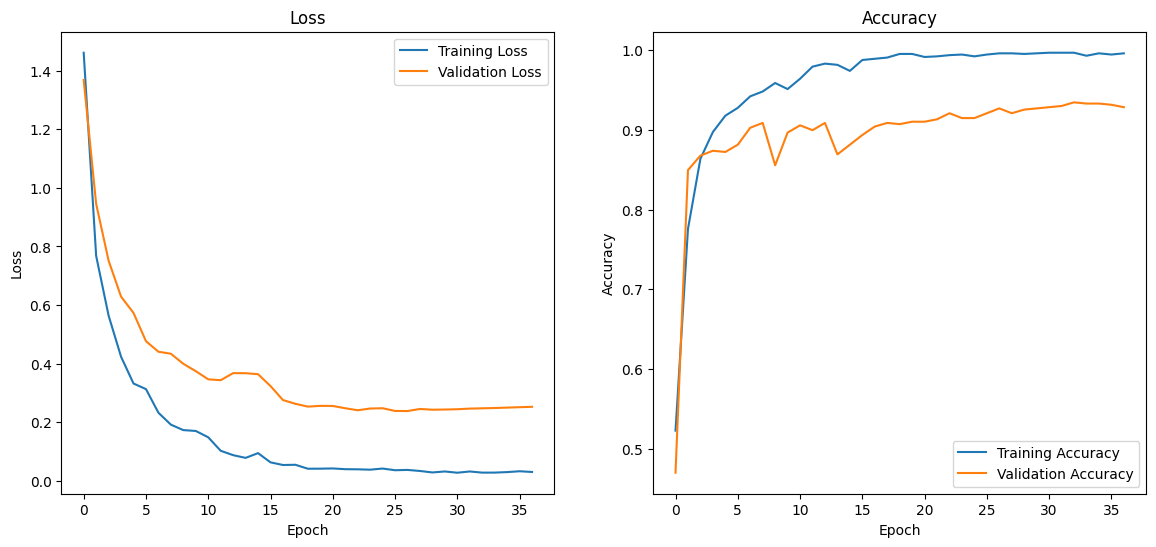

In [ ]:
nnt_new_gender.plot()
nnt_new_gender.test(show=True)

In [ ]:
category = labels[1]
nnt = get_nnt(data_labels, category, 50)

masterCategory model does not exist
Model path: masterCategory_model_init.keras
History path: masterCategory_history_init.csv


In [ ]:
nnt.test(show=True)

masterCategory:	Test loss: 1.167894721031189, Test accuracy: 0.6227272748947144


(1.167894721031189, 0.6227272748947144)

In [ ]:
category = labels[2]
nnt = get_nnt(data_labels, category, 50)

subCategory model does not exist
Model path: subCategory_model_init.keras
History path: subCategory_history_init.csv


In [ ]:
def show_histograms(image, hue_hist, saturation_hist, value_hist):
    """
    Displays the image and its color histograms (Hue, Saturation, and Value) using a mosaic layout.

    Parameters:
    - image (tensorflow.Tensor): The image to display.
    - hue_hist (tensorflow.Tensor): Histogram for the Hue channel.
    - saturation_hist (tensorflow.Tensor): Histogram for the Saturation channel.
    - value_hist (tensorflow.Tensor): Histogram for the Value channel.
    """
    # Convert image from TensorFlow tensor to numpy array
    image_np = image.numpy()

    # Convert from RGB to HSV color space
    image_hsv = tf.image.rgb_to_hsv(image_np)

    # Define the mosaic layout
    fig, axs = plt.subplot_mosaic([
        ['image', 'hue'],
        ['image', 'value'],
        ['image', 'saturation']
    ], layout='constrained', figsize=(12, 6))

    # Plot the image
    axs['image'].imshow(image_np)
    axs['image'].set_title('Image')
    axs['image'].axis('off')

    # Plot Hue histogram with logarithmic scale
    axs['hue'].plot(tf.math.log1p(hue_hist).numpy(), color='r')
    axs['hue'].set_title('Hue Histogram')
    axs['hue'].set_ylim(0, tf.reduce_max(tf.math.log1p(hue_hist).numpy()) * 1.1)

    # Plot Saturation histogram with logarithmic scale
    axs['saturation'].plot(tf.math.log1p(saturation_hist).numpy(), color='g')
    axs['saturation'].set_title('Saturation Histogram')
    axs['saturation'].set_ylim(0, tf.reduce_max(tf.math.log1p(saturation_hist).numpy()) * 1.1)

    # Plot Value histogram with logarithmic scale
    axs['value'].plot(tf.math.log1p(value_hist).numpy(), color='b')
    axs['value'].set_title('Value Histogram')
    axs['value'].set_ylim(0, tf.reduce_max(tf.math.log1p(value_hist).numpy()) * 1.1)

    plt.show()


def extract_color_histograms_from_tensor(image_tensor, bins=256, show=False):
    # Convert TensorFlow tensor to HSV color space
    image_hsv = tf.image.rgb_to_hsv(image_tensor)

    # Define a threshold to identify white pixels (background)
    threshold = 0.9

    # Create a mask for non-background pixels
    background_mask = tf.reduce_all(image_tensor > threshold, axis=-1)

    # Use the mask to filter out background pixels
    foreground_mask = tf.logical_not(background_mask)

    # Apply the mask to the HSV image
    hue_foreground = tf.boolean_mask(image_hsv[:, :, 0], foreground_mask)
    saturation_foreground = tf.boolean_mask(image_hsv[:, :, 1], foreground_mask)
    value_foreground = tf.boolean_mask(image_hsv[:, :, 2], foreground_mask)

    # Calculate histograms for each channel
    hue_hist = tf.histogram_fixed_width(hue_foreground, [0, 1], nbins=bins)
    saturation_hist = tf.histogram_fixed_width(saturation_foreground, [0, 1], nbins=bins)
    value_hist = tf.histogram_fixed_width(value_foreground, [0, 1], nbins=bins)

    # Flatten and normalize histograms
    hue_hist = tf.divide(hue_hist, tf.reduce_sum(hue_hist))
    saturation_hist = tf.divide(saturation_hist, tf.reduce_sum(saturation_hist))
    value_hist = tf.divide(value_hist, tf.reduce_sum(value_hist))

    if show:
        show_histograms(image_tensor, hue_hist, saturation_hist, value_hist)

    # Concatenate histograms into a single array
    histograms = tf.stack([hue_hist, saturation_hist, value_hist], axis=-1)

    return histograms



def extract_color_histograms_from_path(image_path, bins=256, show=False, image_size=IMAGE_SIZE):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)  # Decode as RGB image
    image = tf.image.resize(image, image_size)  # Resize if needed
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]

    return extract_color_histograms_from_tensor(image, bins, show)

def get_histogram_size(bins=256, channels=3):
    return (bins, channels)

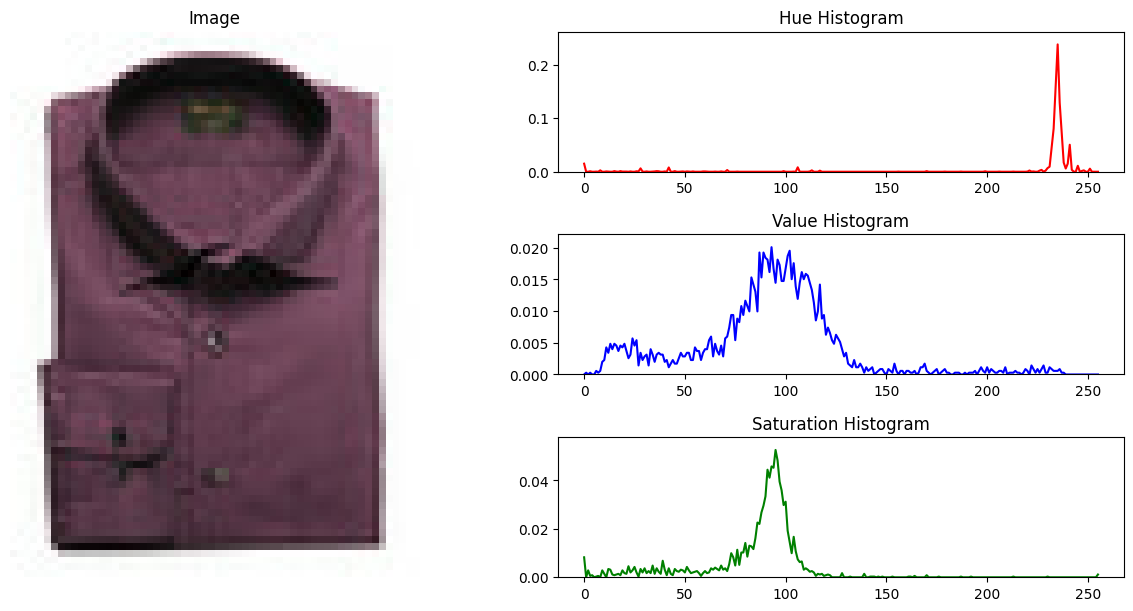

(256, 3)


In [ ]:
# Example usage
path = data_labels.iloc[0]['path']
histograms = extract_color_histograms_from_path(path, show=True)
print(histograms.shape)

In [ ]:
label_lookups[category].get_vocabulary()[data_labels.iloc[0]['baseColour']]

'Flip Flops'

In [ ]:
class splitter_with_histogram:
    def __init__(self, category, df, num_classes,
                image_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
                train_size=0.6, valid_size=0.3, test_size=0.1, silent=False
                ):
        assert (train_size + test_size + valid_size == 1), "Test + Train + Valid must be 1"

        self.category = category
        self.image_size = image_size
        self.hist_size = get_histogram_size()
        self.batch_size = batch_size
        self.num_classes = num_classes
        test, train, valid = self.split(df, train_size, test_size, valid_size, silent)
        self.test_ds = self.create_tf_dataset(test)
        self.train_ds = self.create_tf_dataset(train)
        self.valid_ds = self.create_tf_dataset(valid)

    def split(self, df, train_size, test_size, valid_size, silent):
        # Split data into training and test set
        train_df, temp_df = train_test_split(df, test_size=(test_size+valid_size), random_state=SEED)
        # Split the temporary set into validation and test sets
        validation_df, test_df = train_test_split(temp_df, test_size=(test_size/(valid_size + test_size)), random_state=SEED)

        if not silent:
            # Print the sizes of each set
            print(self.category + ":")
            print(f"\tTraining set size: {len(train_df)} ({int(len(train_df)/len(data) * 100)}%)")
            print(f"\tValidation set size: {len(validation_df)} ({int(len(validation_df)/len(data) * 100)}%)")
            print(f"\tTest set size: {len(test_df)} ({int(len(test_df)/len(data) * 100)}%)")

        return test_df, train_df, validation_df

    def load_image_with_histogram(self, image_path):
        image = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.cast(image, tf.float32)
        image = tf.image.resize(image, self.image_size)  # Resize to the desired size
        image = image / 255.0  # Normalize to [0, 1]
        return extract_color_histograms_from_tensor(image)

    def map_func(self, path, label):
        histogram = self.load_image_with_histogram(path)
        return histogram, label

    def create_tf_dataset(self, df):
        x = df['path'].tolist()
        y = np.array(df[self.category].tolist(), dtype=np.int32)
        y -= 1
        y_one_hot = tf.keras.utils.to_categorical(y, num_classes=self.num_classes)

        dataset = tf.data.Dataset.from_tensor_slices((x, y_one_hot))
        dataset = dataset.map(lambda path, label: self.map_func(path, label))
        dataset = dataset.shuffle(buffer_size=len(df))
        dataset = dataset.batch(self.batch_size)
        dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
        return dataset

    def get_data(self):
        return self.train_ds, self.valid_ds, self.test_ds, self.num_classes

In [ ]:
num_classes = len(label_lookups[category].get_vocabulary()) - 1

In [ ]:
splitters[category] = splitter_with_histogram(category,
                             data_labels,
                             num_classes)

subCategory:
	Training set size: 1315 (2%)
	Validation set size: 658 (1%)
	Test set size: 220 (0%)


In [ ]:
image_size = splitters[category].hist_size
image_size

(256, 3)

In [ ]:
model = keras.Sequential([
    layers.Input(shape=image_size),
    layers.Conv1D(64, kernel_size=5, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),  # Increased units
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Output layer
], name=f'{category}_hist')

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),  # For one-hot encoded labels
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

In [ ]:
nnt_new_basecolour = get_nnt(data_labels, category, epochs=50, model_name='hist', model=model)
nnt_new_basecolour.summary()

Model path: subCategory_model_hist.keras
History path: subCategory_history_hist.csv


Model: "subCategory_hist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 256, 64)             │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 128, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_82               │ (None, 128, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_27 (Flatten)                 │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 45)                  │          11,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,110,253 (8.05 MB)

 Trainable params: 2,110,125 (8.05 MB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
nnt_new_basecolour.test(show=True)

subCategory:	Test loss: 3.8083362579345703, Test accuracy: 0.0


(3.8083362579345703, 0.0)

In [ ]:
num_classes = splitters[category].num_classes
num_classes

n_callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0)
]

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'masterCategory'}>],
       [<Axes: title={'center': 'subCategory'}>,
        <Axes: title={'center': 'articleType'}>,
        <Axes: title={'center': 'baseColour'}>],
       [<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'usage'}>]], dtype=object)

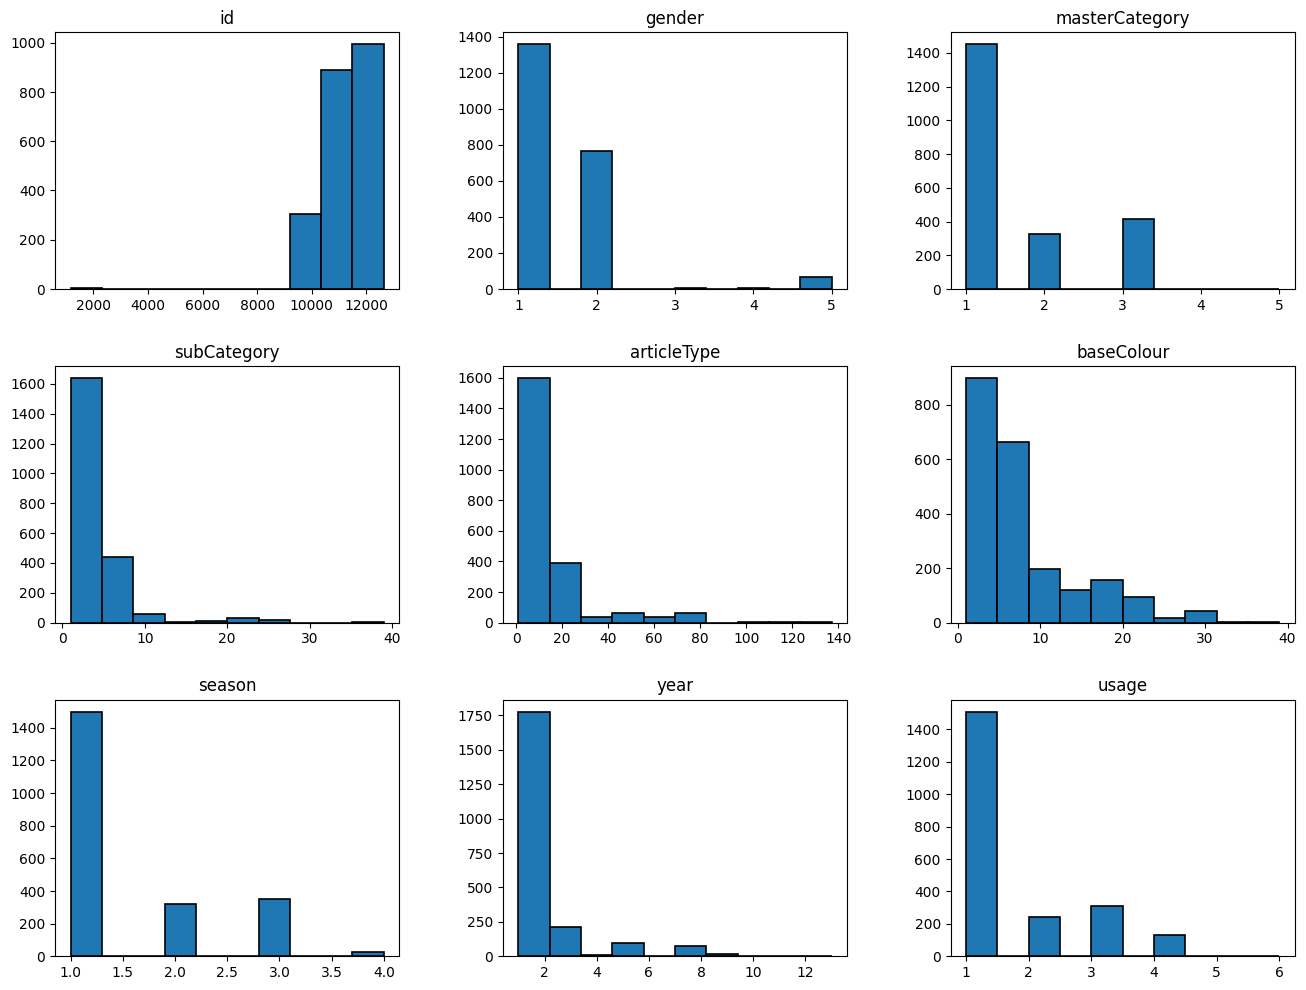

In [ ]:
data_labels.hist(figsize=(16, 12), grid=False, edgecolor='black', linewidth=1.2)

In [ ]:
# Calculate class weights for each label
from sklearn.utils.class_weight import compute_class_weight

class_weights = {}
for label in labels:
    class_weights[label] = compute_class_weight(
        'balanced',
        classes=np.unique(data_labels[label]),
        y=data_labels[label]
    )

In [ ]:
from keras.applications.resnet import preprocess_input
import cv2

IMAGE_DATA_PATH = './image_data.npy'

def load_image(imagePath, image_size=IMAGE_SIZE):
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (image_size[1], image_size[0]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = preprocess_input(image)
    return image

if not os.path.exists(IMAGE_DATA_PATH):
    image_data = []
    for path in tqdm(data_labels['path']):
        image_data.append(load_image(path))
    image_data = np.array(image_data, dtype="float")
    np.save(IMAGE_DATA_PATH, image_data)
else:
    image_data = np.load(IMAGE_DATA_PATH)

  0%|          | 0/2193 [00:00<?, ?it/s]

In [ ]:
from sklearn.preprocessing import LabelBinarizer

y_binarized = []
LB = {}
for label in labels:
    LB[label] = LabelBinarizer()
    y_binarized.append(LB[label].fit_transform(np.array(data_labels[label])))

In [ ]:
split = train_test_split(image_data, *y_binarized, test_size=0.3, random_state=SEED)

In [ ]:
X_train, X_test = split[0], split[1]
X_val, X_test = train_test_split(X_test, test_size=(0.1/0.3), random_state=SEED)
y_train = {}
y_val = {}
y_test = {}
for i in range(2, len(split), 2):
    name = labels[i // 2 - 1]
    x, y = split[i], split[i+1]
    y, z = train_test_split(y, test_size=(0.1/0.3) ,random_state=SEED)
    y_train[f'{name}_top'] = x
    y_val[f'{name}_top'] = y
    y_test[f'{name}_top'] = z

In [ ]:
from keras.applications import ResNet50
from keras.layers import Input, Flatten, Dense, Concatenate, Activation
from tensorflow.keras.models import Model

def build_resnet_based_model(labels, n_outs, concats, image_size=IMAGE_SIZE):
    def make_top(before_top, n_out, name):
        z = Dense(n_out)(before_top)
        z = Activation('softmax', name=f'{name}_top')(z)
        return z

    def make_branch(res_input, name):
        z = Dense(512, activation='relu')(res_input)
        z = Dense(256, activation='relu')(z)
        z = Dense(128, activation='relu', name=f'{name}_out')(z)
        return z

    def make_concat(inp_main, inp_other, name_main, name_other):
        z = Concatenate(name=f'{name_main}_{name_other}_cat')([inp_main, inp_other])
        z = Dense(128, activation='relu')(z)
        return z

    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(*image_size, 3))
    base_model.trainable = False
    inputs = Input(shape=(*image_size, 3))
    x = base_model(inputs, training=False)
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)

    branches = {}
    for label in labels:
        branches[label] = make_branch(x, label)

    befores = {}
    for main, other in concats:
        befores[main] = make_concat(branches[main], branches[other], main, other)

    outputs = []
    for label in labels:
        if label in befores:
            outputs.append(make_top(befores[label], n_outs[label], label))
        else:
            outputs.append(make_top(branches[label], n_outs[label], label))


    model = Model(inputs=inputs, outputs=outputs, name='ResnetBased')

    return model

In [ ]:
concats = [
    ('subCategory', 'masterCategory'),
    ('baseColour', 'masterCategory')
]

# Number of outputs
n_outs = {}
for label in labels:
    n_outs[label] = len(np.unique(data_labels[label]))

In [ ]:
from tensorflow.keras.optimizers import Adam

model = build_resnet_based_model(labels, n_outs, concats)

losses = {}
for label in labels:
    losses[f'{label}_top'] = "categorical_crossentropy"

metrics = {}
for label in labels:
    metrics[f'{label}_top'] = "accuracy"

# Construct class weights dictionary
# class_weight_dict = {label: class_weights[label] for label in df.columns[1:]}


EPOCHS = 25
INIT_LR = 1e-5
BS = 32

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=INIT_LR,
    decay_steps=10000,
    decay_rate=0.9)

opt = Adam(learning_rate=lr_schedule)
model.compile(optimizer=opt, loss=losses, metrics=metrics)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


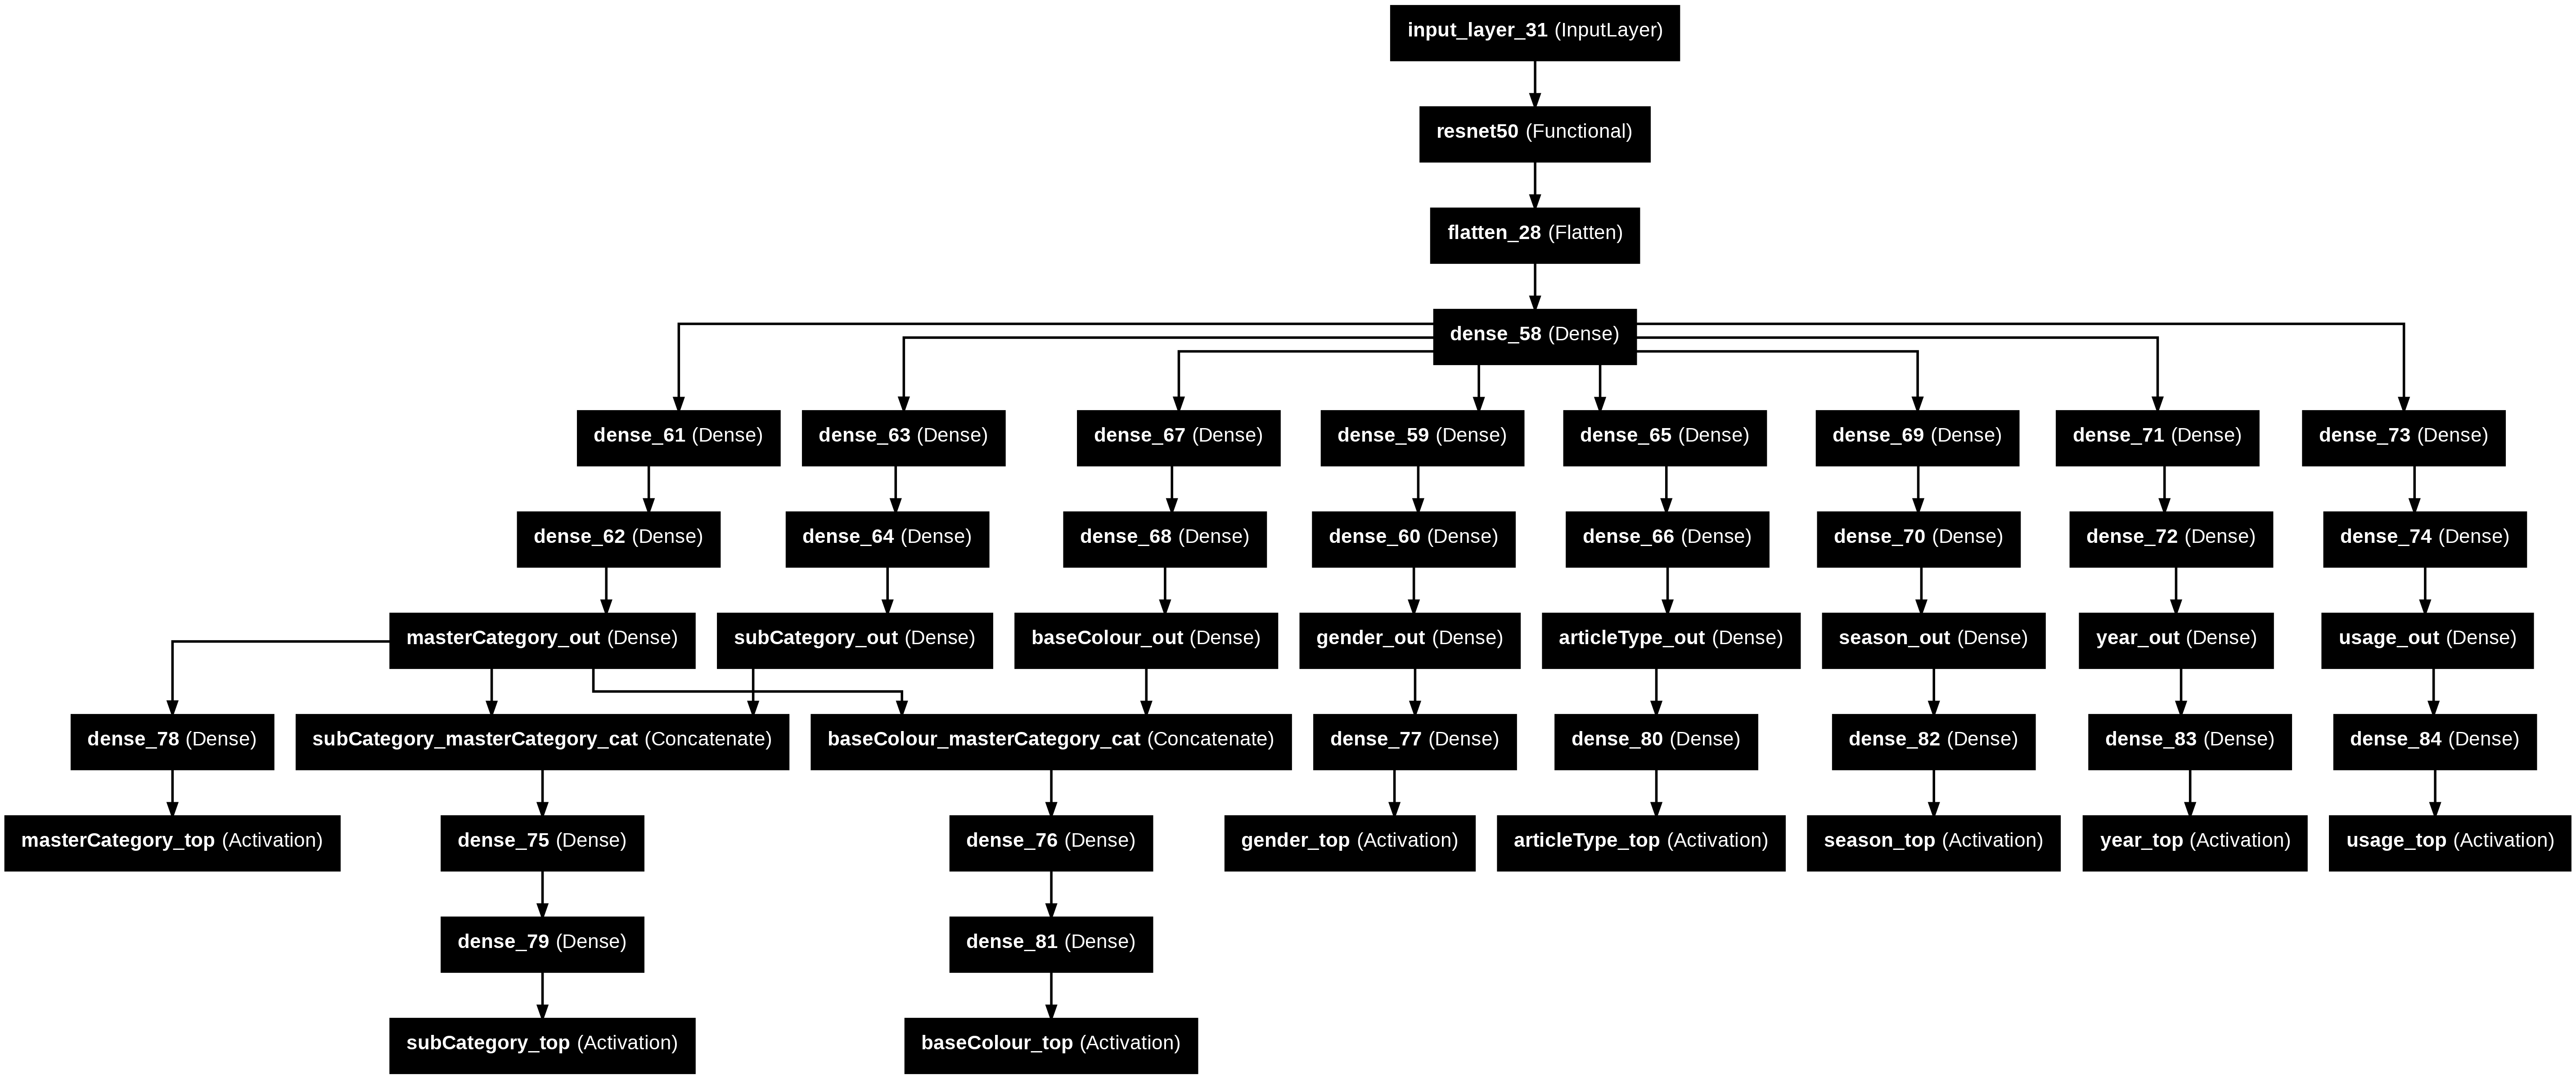

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True)

In [ ]:
model.summary()

Model: "ResnetBased"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_31            │ (None, 80, 60, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 3, 2, 2048)     │     23,587,712 │ input_layer_31[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_28 (Flatten)      │ (None, 12288)          │              0 │ resnet50[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_58 (Dense)          │ (None, 1024)           │     12,583,936 │ flatten_28[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_61 (Dense)          │ (None, 512)            │        524,800 │ dense_58[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_63 (Dense)          │ (None, 512)            │        524,800 │ dense_58[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_67 (Dense)          │ (None, 512)            │        524,800 │ dense_58[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_62 (Dense)          │ (None, 256)            │        131,328 │ dense_61[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_64 (Dense)          │ (None, 256)            │        131,328 │ dense_63[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_68 (Dense)          │ (None, 256)            │        131,328 │ dense_67[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_59 (Dense)          │ (None, 512)            │        524,800 │ dense_58[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ masterCategory_out        │ (None, 128)            │         32,896 │ dense_62[0][0]         │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subCategory_out (Dense)   │ (None, 128)            │         32,896 │ dense_64[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_65 (Dense)          │ (None, 512)            │        524,800 │ dense_58[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ baseColour_out (Dense)    │ (None, 128)            │         32,896 │ dense_68[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_69 (Dense)          │ (None, 512)            │        524,800 │ dense_58[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_71 (Dense)          │ (None, 512)            │        524,800 │ dense_58[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_73 (Dense)          │ (None, 512)            │        524,800 │ dense_58[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_60 (Dense)     

 Total params: 41,764,983 (159.32 MB)

 Trainable params: 18,177,271 (69.34 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(
        X_val, y_val
    ),
    epochs=EPOCHS,
    batch_size=BS,
    callbacks=[early_stopping]
)

Epoch 1/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - articleType_top_accuracy: 0.0633 - baseColour_top_accuracy: 0.0814 - gender_top_accuracy: 0.6334 - loss: 16.7526 - masterCategory_top_accuracy: 0.6146 - season_top_accuracy: 0.3656 - subCategory_top_accuracy: 0.2520 - usage_top_accuracy: 0.3647 - year_top_accuracy: 0.5724 - val_articleType_top_accuracy: 0.3767 - val_baseColour_top_accuracy: 0.1575 - val_gender_top_accuracy: 0.7534 - val_loss: 9.9837 - val_masterCategory_top_accuracy: 0.9064 - val_season_top_accuracy: 0.7237 - val_subCategory_top_accuracy: 0.7511 - val_usage_top_accuracy: 0.7169 - val_year_top_accuracy: 0.8105
Epoch 2/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - articleType_top_accuracy: 0.4272 - baseColour_top_accuracy: 0.2144 - gender_top_accuracy: 0.8360 - loss: 8.6178 - masterCategory_top_accuracy: 0.9477 - season_top_accuracy: 0.7620 - subCategory_top_accuracy: 0.7733 - usage_top_accuracy: 0.7640 - year_top_accuracy: 0.8473 - val_articleType_top_accuracy: 0.5457 -

In [ ]:
model.save('resnet_based.keras')
pd.DataFrame(history.history).to_csv('history_resnet.csv')

In [ ]:
plts = ['loss', *[f'{label}_top_accuracy' for label in labels]]
plts = [(p, f'val_{p}') for p in plts]

In [ ]:
frame = pd.DataFrame(history.history)
num_subplots = len(frame.columns) // 2
fig, axs = plt.subplots(num_subplots // 3, 3, figsize=(14, 16))

for i, (p, p_v) in enumerate(plts):
    name = p.replace('_top_accuracy', '')
    title = f'{name} Accuracy' if name != 'loss' else 'Loss'
    axs[i // 3, i % 3].set_title(title)
    values_train = frame[p]
    values_valid = frame[p_v]
    axs[i // 3, i % 3].plot(values_train, label='Training')
    axs[i // 3, i % 3].plot(values_valid, label='Validation')
    axs[i // 3, i % 3].legend(loc='lower right')
    axs[i // 3, i % 3].set_xlabel('Epochs')
    axs[i // 3, i % 3].set_ylabel('Accuracy' if name != 'loss' else 'Loss')


plt.show()